### Hopfield Networks

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

## Part 1

In [2]:
ball = np.loadtxt("ball.txt", delimiter=",")
cat = np.loadtxt("cat.txt", delimiter=",")
mona = np.loadtxt("mona.txt", delimiter=",")

In [3]:
def preprocess(ia):
    """Ensuring that black pixels are represented by +1 and
       white pixels by -1. 
    """    
    ia = np.sign(ia)
    ia[np.where(ia==0)] = 1
    return ia

nb = preprocess(ball)
nm = preprocess(mona)
nc = preprocess(cat)

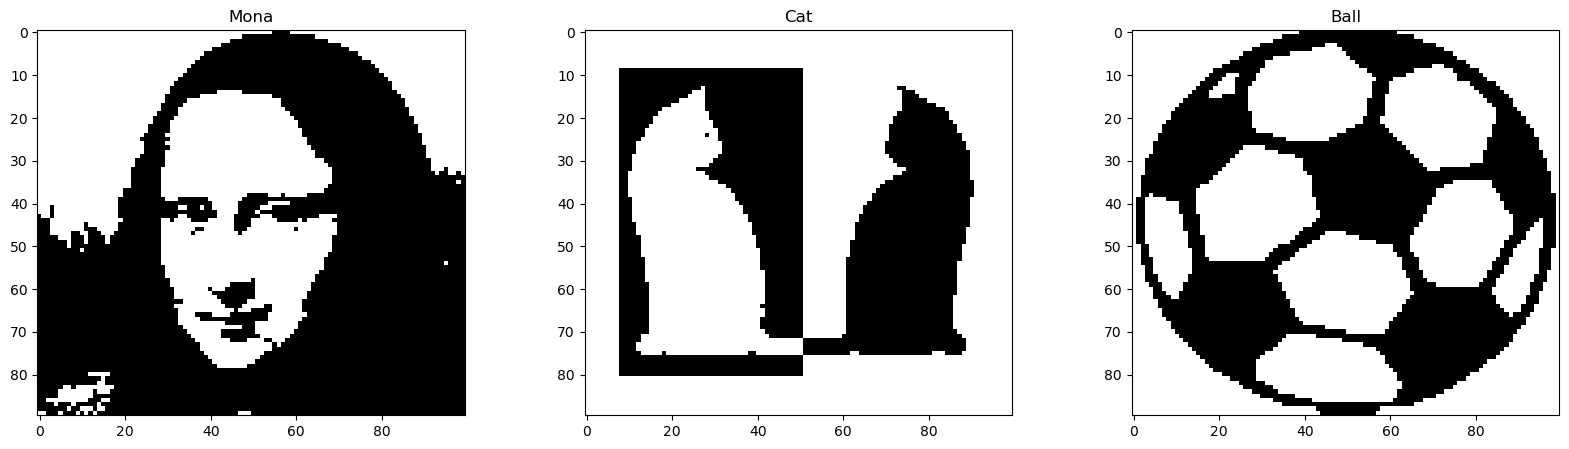

In [4]:
plt.figure(figsize = (20,5))

plt.subplot(131)
plt.title("Mona")
plt.imshow(nm, cmap='gray')

plt.subplot(132)
plt.title("Cat")
plt.imshow(nc,cmap='gray')

plt.subplot(133)
plt.title("Ball")
plt.imshow(nb, cmap='gray')


In [ ]:
"""
For the hopfield network, the state of the node V depends on the discrete time step. 
I have maintained V values of all 9000 nodes as a single vector V(i) for the time step i. 
The (9000, 6) matrix in the next cell is the concatenation of such V(i) vectors for 6 discrete time steps.
6 iterations are more than enough to let the V vector converge to the stored pattern S.
A running list of mse for each iteration is also maintained.
"""

In [5]:
def sin_patt_hopf(S,V):
    """Single pattern hopfield network"""
    
    N = S.size
    W = (S@S.T)/N
    rms = [mse(V, S, squared=False)]
    
    for i in range(5):
        V = np.concatenate((V,np.sign(W@V)), axis=1)
        rv = mse(V[:,-1], S, squared=False)
        rms.append(rv)    
        
#         print("\nStep ", i)
#         print(V)
#         print(rms)
       
    return V, rms    

## Part 2

In [6]:
def get_patch(img):
    """Defines a random patch region in the image"""
    
    min_x, min_y = 20,20
    max_x, max_y = 45,45
    
    x = np.random.randint(0, img.shape[0]-max_x-1)
    y = np.random.randint(0, img.shape[1]-max_y-1)
    rx = np.random.randint(min_x, max_x) # range of x
    ry = np.random.randint(min_y, max_y) # range of y

    patch = np.zeros(img.shape)
    patch[x:x+rx, y:y+ry] = img[x:x+rx, y:y+ry]
    
    return patch    

In [7]:
def visualise_patch(img, patch):
    """Displays both the original image and patch side by side"""
    
    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.title("Original image")
    plt.imshow(img, cmap='gray')

    plt.subplot(122)
    plt.title("Patch or piece")
    plt.imshow(patch,cmap='gray')

In [8]:
def reconstruct(img, pc):
    """ Reconstructs the image from a patch by converging to the single attractor in the
        single pattern hopfield network   
    """
    
    s = img.reshape(-1,1)
    v = pc.reshape(-1,1)
#     v = np.random.randint(0,1, sm.shape)

    vn, ra = sin_patt_hopf(s,v)

    plt.figure(figsize = (20,5))
    plt.subplot(131)
    plt.title("Original image")
    plt.imshow(img, cmap='gray')

    plt.subplot(132)
    plt.title("Patch or piece")
    plt.imshow(pc,cmap='gray')
    
    plt.subplot(133)
    plt.title("Reconstructed image")
    plt.imshow(vn[:,-1].reshape(90,100),cmap='gray')
    
    return ra

In [9]:
def error_plot(ra):
    """Plots the RMSE as a function of nth iteration"""
    
    plt.figure(figsize = (4,4))
    plt.plot(ra, 'r-')
    plt.xlabel('Number of iteration')
    plt.ylabel('RMSE')
    plt.title("Evolution of RMSE with number of iterations")
    plt.grid(alpha=0.25)
    

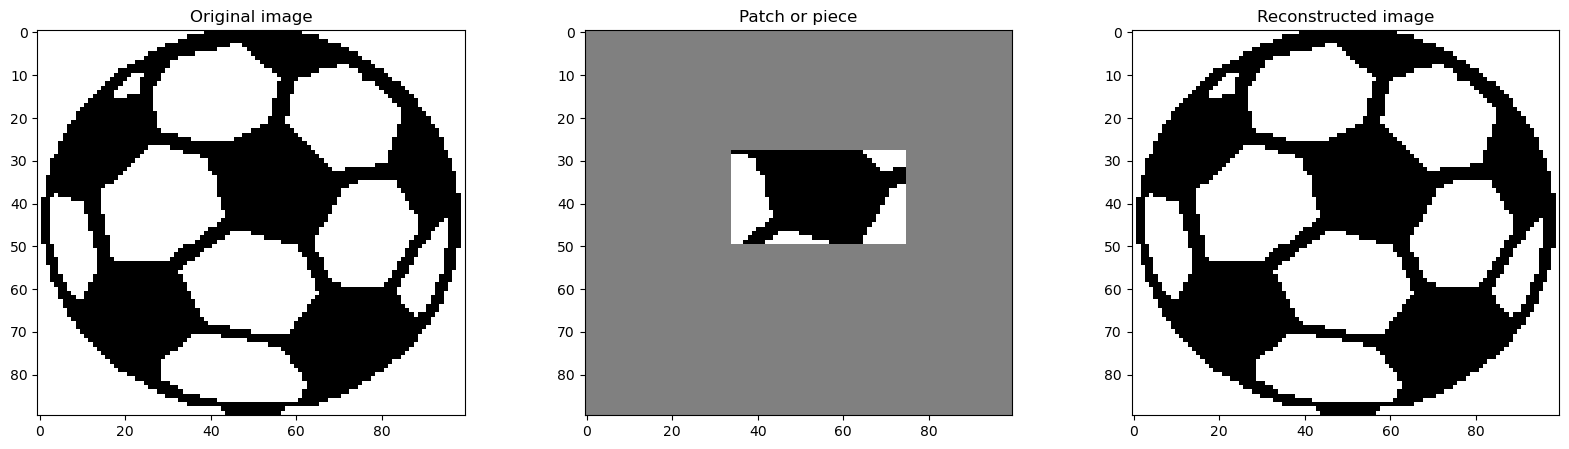

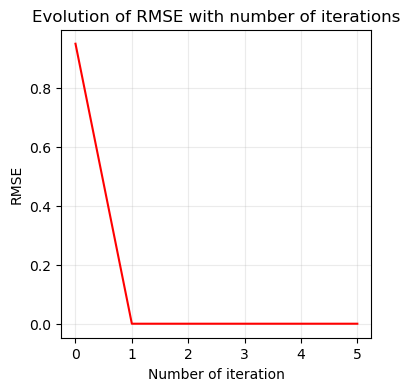

In [10]:
# Reconstructing ball image from a patch
r = reconstruct(nb, get_patch(nb))
error_plot(r)

In [ ]:
"""We see that error decreases very rapidly, falling to 0 in 2 iterations."""

## Part 3

In [ ]:
"""
Multiple patterns are stored in the bigS matrix in the form [S1, S2, S3]. This is also generalized to store Sp patterns, if necessary.
RMSE for the ith iteration is calculated as (1,3) vector and subsequent RMSE for other iterations are concatenated below it.
"""

In [11]:
def multi_patt_hopf(bigS,V):
    """Multiple pattern hopfield network
       Return - V: entire history of V vector evolution
             rms : history of declining rmse
    """
    
    N = bigS[:,0].size
    W = bigS@bigS.T
    rms = np.sqrt(np.mean(((bigS - V) ** 2), axis=0)).reshape(1,-1)
    
    for i in range(5):
        V = np.concatenate((V,np.sign(W@V)), axis=1)
        rv = np.sqrt(np.mean(((bigS - V[:,-1].reshape(-1,1)) ** 2), axis=0)).reshape(1,-1)
        rms = np.concatenate((rms,rv), axis=0)    
       
    return V, rms    

In [12]:
#storing all 3 patterns in the network:
s1 = nb.reshape(-1,1)
s2 = nm.reshape(-1,1)
s3 = nc.reshape(-1,1)
biS = np.concatenate((s1,s2,s3), axis=1)

In [13]:
def multi_recon(bigS, pc):
    """ Reconstructs the image from a patch by converging to the attractor in the
        multiple pattern hopfield network   
    """
    
    v = pc.reshape(-1,1)
    vn, ra = multi_patt_hopf(bigS,v)

    plt.figure(figsize = (10,8))
    plt.subplot(121)
    plt.title("Patch or piece")
    plt.imshow(pc,cmap='gray')
    
    plt.subplot(122)
    plt.title("Reconstructed image")
    plt.imshow(vn[:,-1].reshape(90,100),cmap='gray')
    
    return ra
    

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.07991769 1.0587204  0.93903023]
 [1.35908466 1.42111068 0.        ]
 [1.35908466 1.42111068 0.        ]
 [1.35908466 1.42111068 0.        ]
 [1.35908466 1.42111068 0.        ]
 [1.35908466 1.42111068 0.        ]]


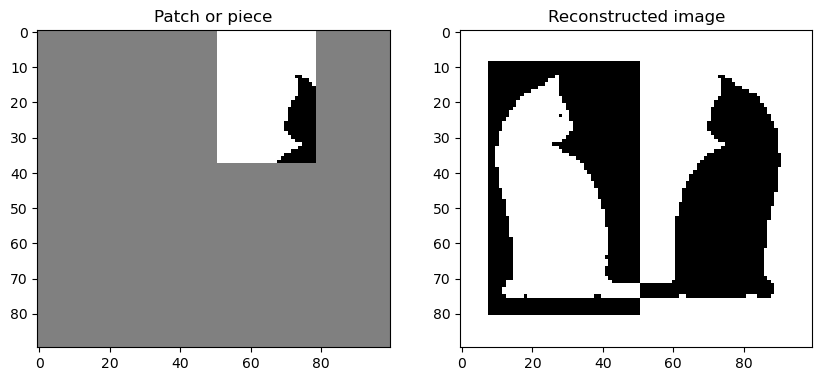

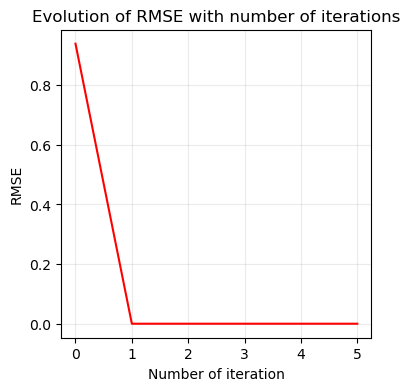

In [14]:
rc = multi_recon(biS, get_patch(nc))
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rc)
error_plot(rc[:,-1])

In [ ]:
"""It is observed that the patch correctly converges to the cat with the corresponding RMSE dropping to 0 quickly"""

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[0.95382272 1.06854002 1.06228266]
 [0.         1.42392259 1.35908466]
 [0.         1.42392259 1.35908466]
 [0.         1.42392259 1.35908466]
 [0.         1.42392259 1.35908466]
 [0.         1.42392259 1.35908466]]


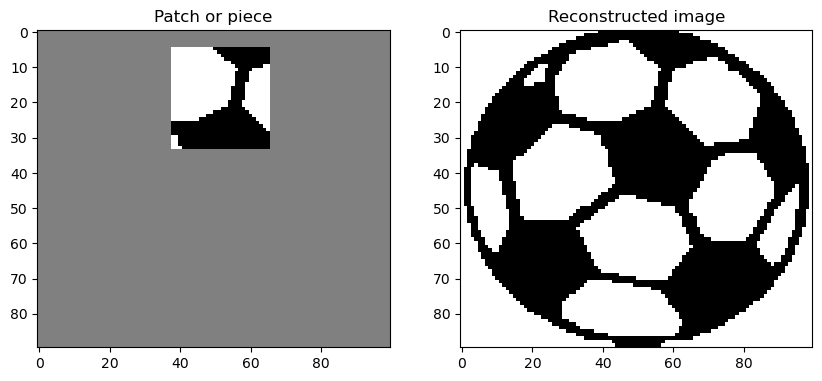

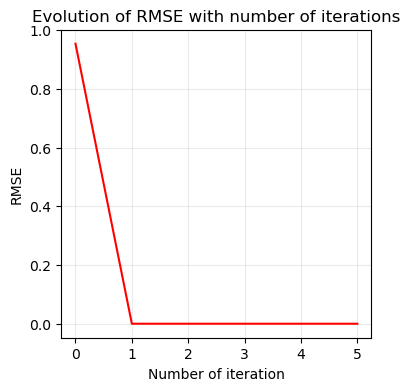

In [15]:
rb = multi_recon(biS, get_patch(nb))
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rb)
error_plot(rb[:,0])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.04583831 0.95219046 1.02415277]
 [1.42392259 0.         1.42111068]
 [1.42392259 0.         1.42111068]
 [1.42392259 0.         1.42111068]
 [1.42392259 0.         1.42111068]
 [1.42392259 0.         1.42111068]]


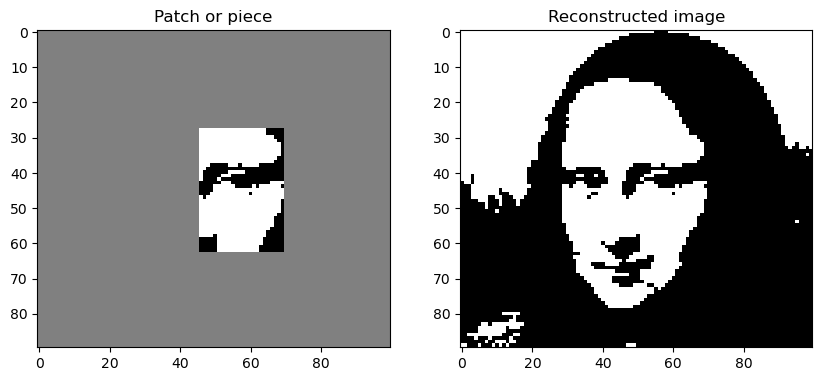

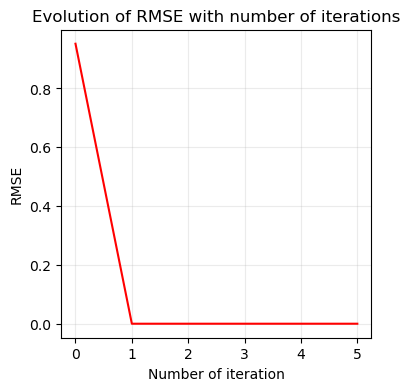

In [16]:
rm = multi_recon(biS, get_patch(nm))
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rm)
error_plot(rm[:,1])

### Damaged Weight Matrix

In [17]:
def damaged_hopf(bigS,V, damp):
    """Multiple pattern damaged hopfield network
       Return - V: entire history of V vector evolution
             rms : history of declining rmse
    """
    
    N = bigS[:,0].size
    W = bigS@bigS.T
    
    rng = default_rng()
    pos = rng.choice(N*N, size=(int(N*N*damp),1), replace=False)
    W = W.reshape(-1,1)
    W[pos] = 0    
    W = W.reshape(N,N) 
    
    rms = np.sqrt(np.mean(((bigS - V) ** 2), axis=0)).reshape(1,-1)
    
    for i in range(1):  # I have reduced the number of iterations in order to show the damage later
        V = np.concatenate((V,np.sign(W@V)), axis=1)
        rv = np.sqrt(np.mean(((bigS - V[:,-1].reshape(-1,1)) ** 2), axis=0)).reshape(1,-1)
        rms = np.concatenate((rms,rv), axis=0)    
       
    return V, rms 

In [18]:
def dam_recon(bigS, pc, damp):
    """ Reconstructs the image from a patch by converging to the attractor in the
        multiple pattern damaged hopfield network   
    """
    
    v = pc.reshape(-1,1)
    vn, ra = damaged_hopf(bigS,v, damp)

    plt.figure(figsize = (10,8))
    plt.subplot(121)
    plt.title("Patch or piece")
    plt.imshow(pc,cmap='gray')
    
    plt.subplot(122)
    plt.title("Reconstructed image")
    plt.imshow(vn[:,-1].reshape(90,100),cmap='gray')
    
    return ra

### Damage - 25 percent

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.02913124 1.00686532 0.9486833 ]
 [1.35908466 1.42111068 0.        ]]


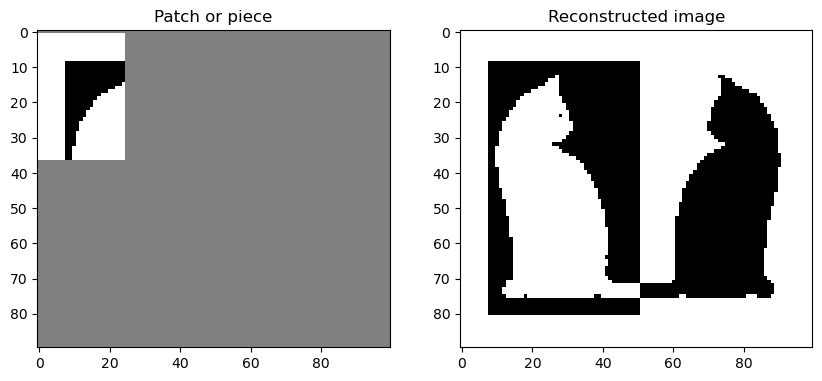

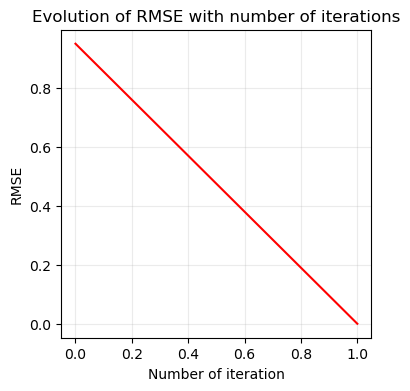

In [19]:
rc = dam_recon(biS, get_patch(nc), 0.25)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rc)
error_plot(rc[:,-1])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[0.92544284 1.0970668  1.09564796]
 [0.         1.42392259 1.35908466]]


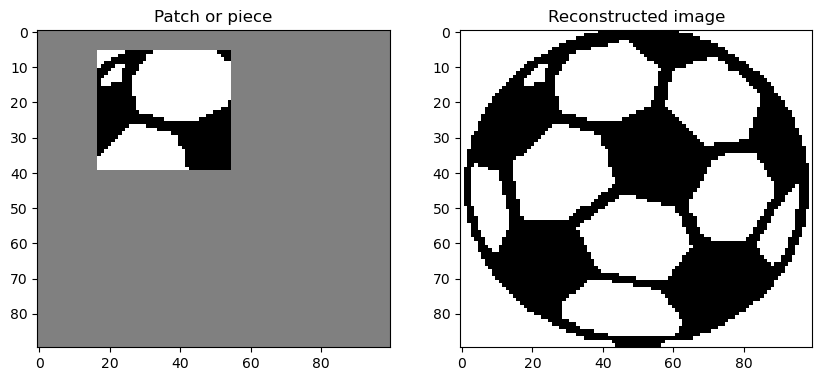

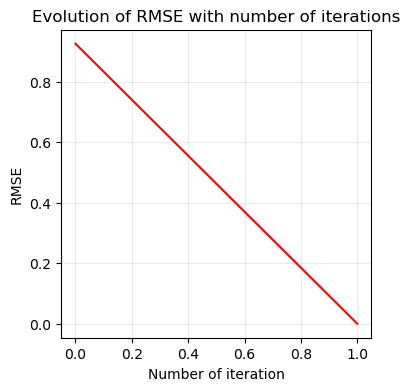

In [20]:
rb = dam_recon(biS, get_patch(nb), 0.25)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rb)
error_plot(rb[:,0])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.0797119  0.92376043 1.08566416]
 [1.42392259 0.         1.42111068]]


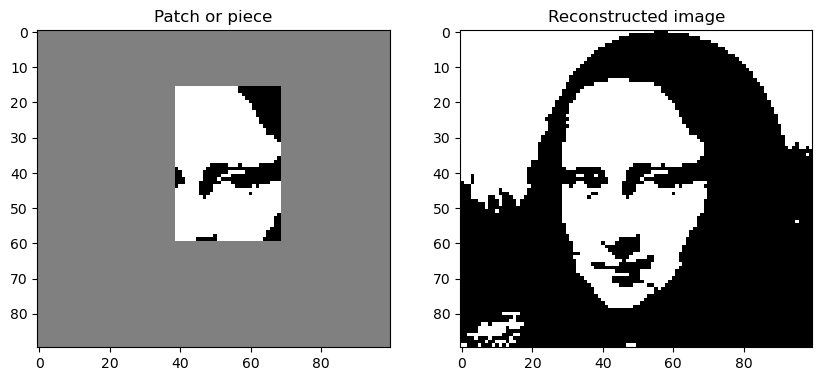

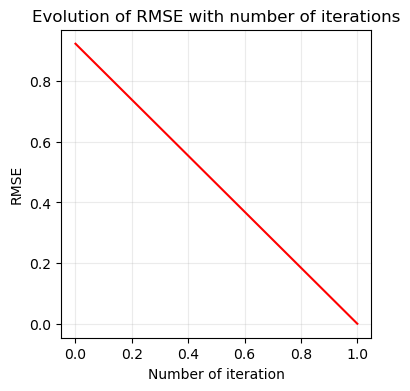

In [21]:
rm = dam_recon(biS, get_patch(nm), 0.25)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rm)
error_plot(rm[:,1])

### Damage - 50 percent

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.10262313 1.08535708 0.92748166]
 [1.35908466 1.42111068 0.        ]]


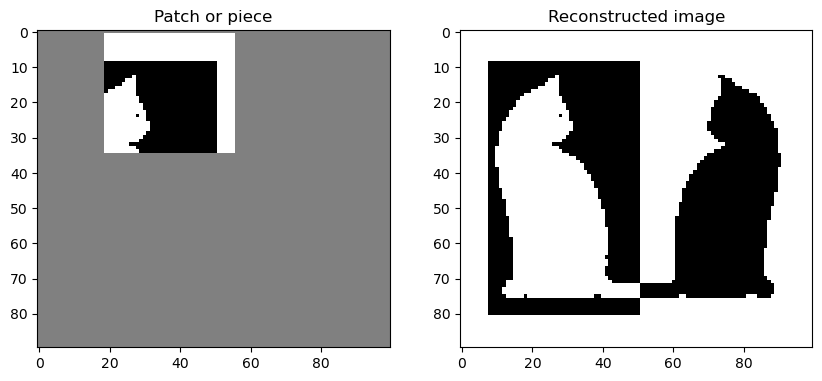

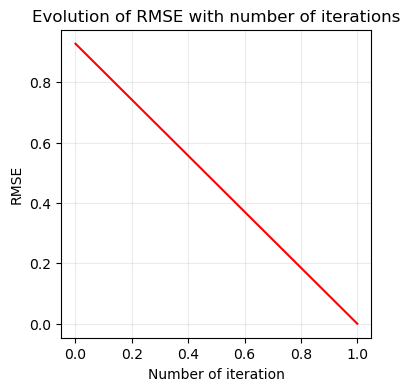

In [22]:
rc = dam_recon(biS, get_patch(nc), 0.5)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rc)
error_plot(rc[:,-1])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[0.94563324 1.03150376 1.05788048]
 [0.         1.42392259 1.35908466]]


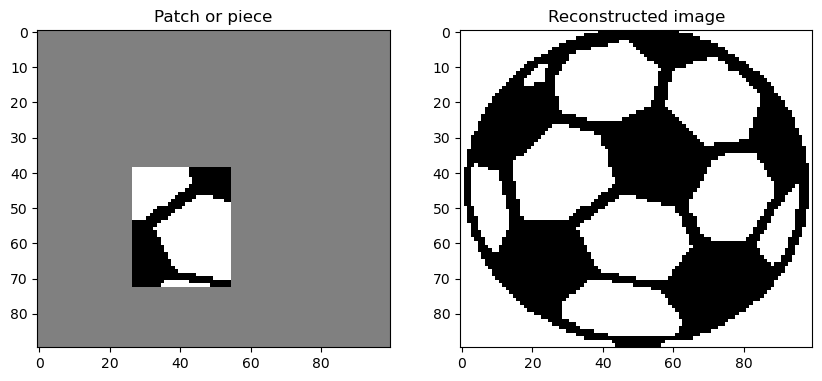

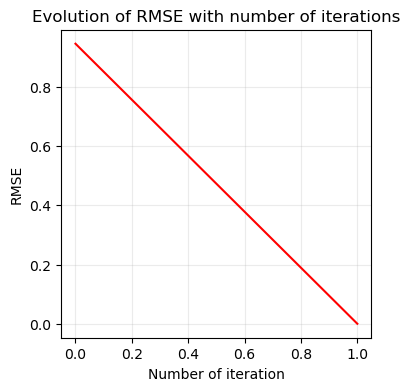

In [23]:
rb = dam_recon(biS, get_patch(nb), 0.5)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rb)
error_plot(rb[:,0])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.06228266 0.96332757 1.02956301]
 [1.42392259 0.         1.42111068]]


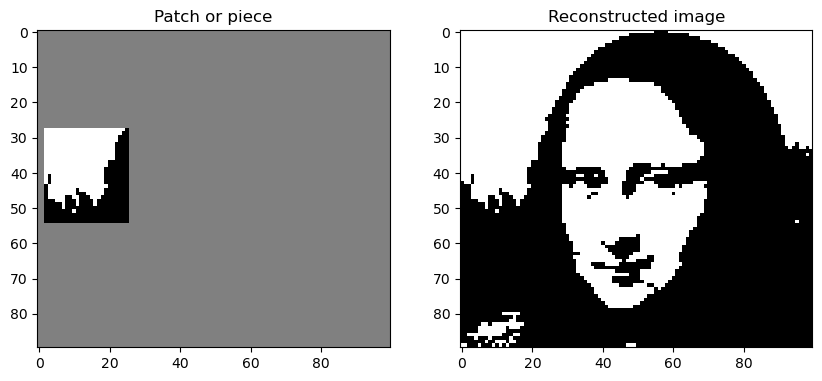

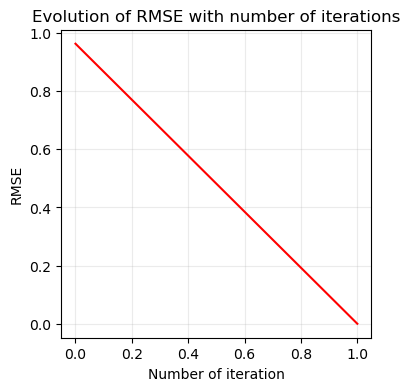

In [24]:
rm = dam_recon(biS, get_patch(nm), 0.5)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rm)
error_plot(rm[:,1])

### Damage - 95 percent

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.06123618 1.08730043 0.9307106 ]
 [1.35908466 1.42111068 0.        ]]


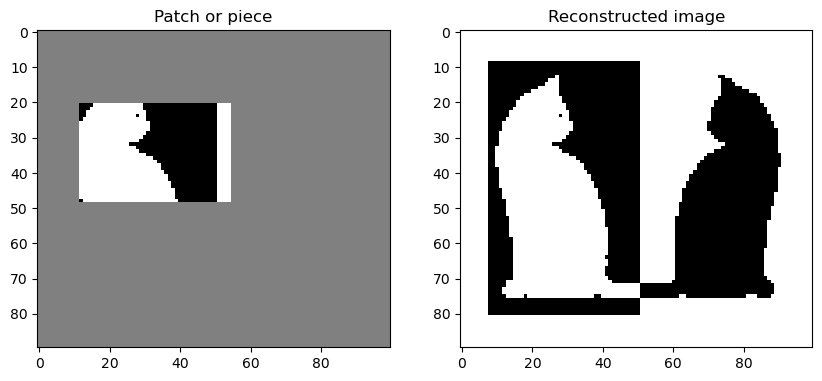

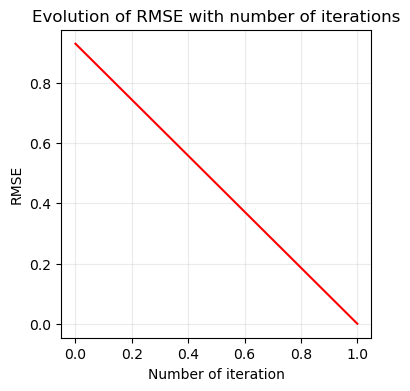

In [25]:
rc = dam_recon(biS, get_patch(nc), 0.95)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rc)
error_plot(rc[:,-1])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[0.91778719 1.1325978  1.12472219]
 [0.24013885 1.44402986 1.38013687]]


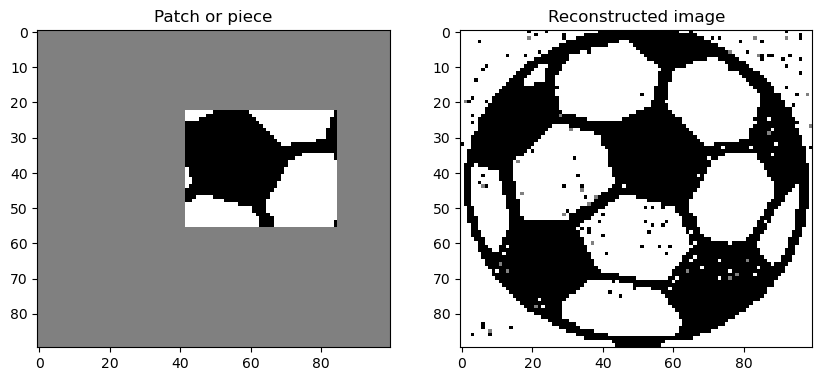

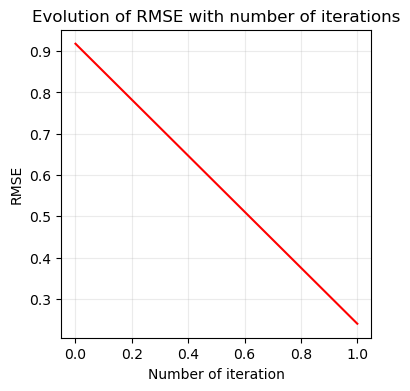

In [26]:
rb = dam_recon(biS, get_patch(nb), 0.95)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rb)
error_plot(rb[:,0])

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.10302614 0.9355925  1.07009865]
 [1.42392259 0.         1.42111068]]


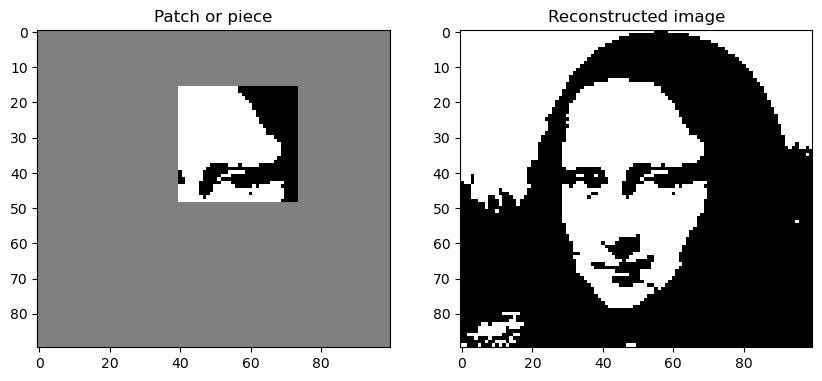

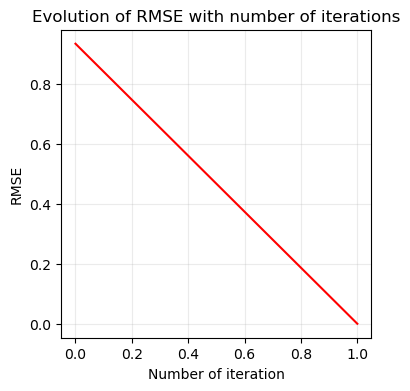

In [27]:
rm = dam_recon(biS, get_patch(nm), 0.95)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rm)
error_plot(rm[:,1])

In [ ]:
"""It seems that only the ball image is susceptible to errors, while the other two are robust."""

RMSE for initial V vector across all stored Sp:
In the order RMSE nb, nm, nc
[[1.05514612 0.94233752 1.05893028]
 [1.         1.         1.        ]]


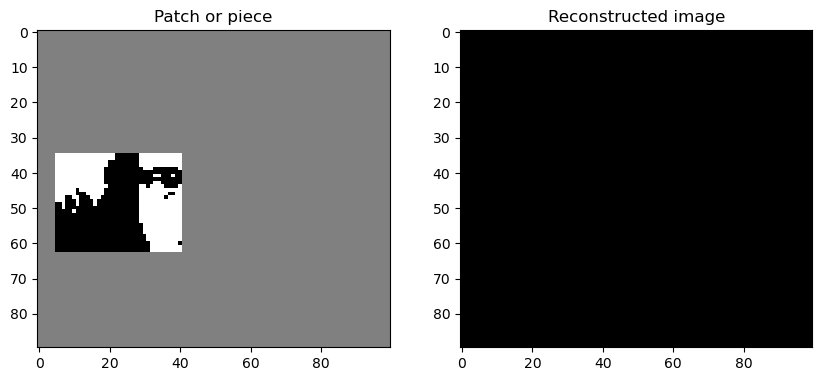

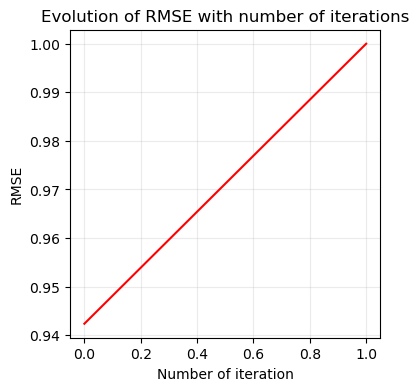

In [28]:
#Trivial 100 percent damage - weights = 0:
rm = dam_recon(biS, get_patch(nm), 1)
print("RMSE for initial V vector across all stored Sp:")
print("In the order RMSE nb, nm, nc")
print(rm)
error_plot(rm[:,1])